# Solving Navigation Problem by DRL Value-based Method(vanilla DQN)
---
In this notebook, we will implement a DQN agent with Unity ML-Agents Banana environment.

### 1. Import the Necessary Packages

In [1]:
import random
import torch
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

### 2. Import the Necesaary Packages to start the Environment

We begin by importing some necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [2]:
from unityagents import UnityEnvironment
import numpy as np

### 3. Instantiate the Environment

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Banana.app"`
- **Windows** (x86): `"path/to/Banana_Windows_x86/Banana.exe"`
- **Windows** (x86_64): `"path/to/Banana_Windows_x86_64/Banana.exe"`
- **Linux** (x86): `"path/to/Banana_Linux/Banana.x86"`
- **Linux** (x86_64): `"path/to/Banana_Linux/Banana.x86_64"`
- **Linux** (x86, headless): `"path/to/Banana_Linux_NoVis/Banana.x86"`
- **Linux** (x86_64, headless): `"path/to/Banana_Linux_NoVis/Banana.x86_64"`

For instance, if you are using a Mac, then you downloaded `Banana.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Banana.app")
```

In [3]:
env = UnityEnvironment(file_name="Banana.app")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [4]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

In [5]:
brain_name

'BananaBrain'

In [6]:
brain

### 4. Examine the State and Action Spaces

The simulation contains a single agent that navigates a large environment.  At each time step, it has four actions at its disposal:
- `0` - walk forward 
- `1` - walk backward
- `2` - turn left
- `3` - turn right

The state space has `37` dimensions and contains the agent's velocity, along with ray-based perception of objects around agent's forward direction.  A reward of `+1` is provided for collecting a yellow banana, and a reward of `-1` is provided for collecting a blue banana. 

Run the code cell below to print some information about the environment.

In [7]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.vector_observations[0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)

Number of agents: 1
Number of actions: 4
States look like: [1.         0.         0.         0.         0.84408134 0.
 0.         1.         0.         0.0748472  0.         1.
 0.         0.         0.25755    1.         0.         0.
 0.         0.74177343 0.         1.         0.         0.
 0.25854847 0.         0.         1.         0.         0.09355672
 0.         1.         0.         0.         0.31969345 0.
 0.        ]
States have length: 37


### 5. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Once this cell is executed, you will watch the agent's performance, if it selects an action (uniformly) at random with each time step.  A window should pop up that allows you to observe the agent, as it moves through the environment.  

Of course, as part of the project, you'll have to change the code so that the agent is able to use its experience to gradually choose better actions when interacting with the environment!

In [8]:
env_info = env.reset(train_mode=False)[brain_name] # reset the environment
state = env_info.vector_observations[0]            # get the current state
score = 0                                          # initialize the score
while True:
    action = np.random.randint(action_size)        # select an action
    env_info = env.step(action)[brain_name]        # send the action to the environment
    next_state = env_info.vector_observations[0]   # get the next state
    reward = env_info.rewards[0]                   # get the reward
    done = env_info.local_done[0]                  # see if episode has finished
    score += reward                                # update the score
    state = next_state                             # roll over the state to next time step
    if done:                                       # exit loop if episode finished
        break
    
print("Score: {}".format(score))

Score: 0.0


When finished, you can close the environment.

In [ ]:
env.close()

### 6. Train our own Agent with DQN

Now it's our turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

In [9]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

Before running the next code cell, check yourself with the code in `dqn_agent.py` and `model.py`.  Once you have an understanding of how the different files work together, 
- Check a neural network architecture in `model.py` that maps states to action values.  This file is to define our own deep Q-network!
- Check the `learn` method in the `Agent` class in `dqn_agent.py`.  We assume that that sampled batch of experience tuples is already provided for us; we need only use the local and target Q-networks to compute the loss, before taking a step towards minimizing the loss.

In [10]:
from dqn_agent import Agent

agent = Agent(state_size=state_size, action_size=action_size, seed=0)

### Vanilla DQN Model Architecture 

In [18]:
agent.qnetwork_local

QNetwork(
  (fc1): Linear(in_features=37, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=4, bias=True)
)

In [19]:
agent.qnetwork_target

QNetwork(
  (fc1): Linear(in_features=37, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=4, bias=True)
)

### Chosen Hyperparamters
* BUFFER_SIZE = int(1e5)  : replay buffer size
* BATCH_SIZE = 64         : minibatch size
* GAMMA = 0.99            : discount factor
* TAU = 1e-3              : for soft update of target parameters
* LR = 5e-4               : learning rate
* UPDATE_EVERY = 4        : how often to update the network

* eps_start=1.0 : Epsilon-Greedy ϵ start value
* eps_end=0.01 : Epsilon-Greedy ϵ end value
* eps_decay=0.995 : Epsilon-Greedy ϵ decay value

Run the code cell below to train the agent from scratch.

Episode 100	Average Score: 1.86
Episode 200	Average Score: 6.27
Episode 300	Average Score: 8.62
Episode 400	Average Score: 9.97
Episode 500	Average Score: 11.72
Episode 568	Average Score: 13.01
Environment solved in 468 episodes!	Average Score: 13.01


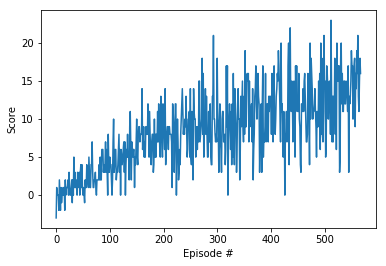

In [14]:
def dqn(n_episodes=2000, max_t=1000, eps_start=1.0, eps_end=0.01, eps_decay=0.995):
    """Deep Q-Learning.
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """
    scores = []                        # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores
    eps = eps_start                    # initialize epsilon
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]
        state = env_info.vector_observations[0]
        score = 0
        for t in range(max_t):
            action = agent.act(state, eps)
            env_info = env.step(action)[brain_name]
            next_state = env_info.vector_observations[0]
            reward = env_info.rewards[0]
            done = env_info.local_done[0]
            agent.step(state, action, reward, next_state, done)
            state = next_state
            score += reward
            if done:
                break 
        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score
        eps = max(eps_end, eps_decay*eps) # decrease epsilon
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
        if np.mean(scores_window)>=13.0:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_window)))
            torch.save(agent.qnetwork_local.state_dict(), 'checkpoint.pth')
            break
    return scores

scores = dqn()

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

### 7. Watch the vanilla DQN Agent!

In the next code cell, you will load the trained weights from file to watch a the vanilla DQN Agent!

In [16]:
# load the weights from file
agent.qnetwork_local.load_state_dict(torch.load('checkpoint.pth'))

for i in range(3):
    env_info = env.reset(train_mode=False)[brain_name]
    state = env_info.vector_observations[0]
    for j in range(200):
        action = agent.act(state)
        env_info = env.step(action)[brain_name]
        next_state = env_info.vector_observations[0]
        reward = env_info.rewards[0]
        done = env_info.local_done[0]
        agent.step(state, action, reward, next_state, done)
        state = next_state
        score += reward
        if done:
            break 

In [ ]:
env.close()

## Future Work

### 1. Explore the current vanilla DQN Algorithm

    * Amend the various hyperparameters and network architecture to see if we can get your agent to solve the environment faster. 
    * Once we build intuition for the hyperparameters that work well with this environment, try solving a different OpenAI Gym task with discrete actions.

### 2. Explore the extension Alogrithms of vanilla DQN
    * We would like to implement some improvements such as ...
        - [Prioritized Experience Replay](https://arxiv.org/abs/1511.05952)
        - [Double DQN](https://arxiv.org/abs/1509.06461)
        - [Dueling DQN](https://arxiv.org/abs/1511.06581)
        - [Learning from multi-step bootstrap targets (as in A3C)](https://arxiv.org/abs/1602.01783)
        - [Distributional DQN](https://arxiv.org/abs/1707.06887)
        - [Noisy DQN](https://arxiv.org/abs/1706.10295)
        - [Rainbow](https://arxiv.org/abs/1710.02298)

![Performance Comparison](assets/Performance_on_Atari_games_comparison_of_Rainbow.png)

### Reference In Practice

In mid-2018, OpenAI held [a contest](https://contest.openai.com/), where participants were tasked to create an algorithm that could learn to play the [Sonic the Hedgehog](https://en.wikipedia.org/wiki/Sonic_the_Hedgehog) game. The participants were tasked to train their RL algorithms on provided game levels; then, the trained agents were ranked according to their performance on previously unseen levels.

Thus, the contest was designed to assess the ability of trained RL agents to generalize to new tasks.

![Sonic the Hedgehog](assets/sonic.gif)
[source](https://contest.openai.com/)

One of the provided baseline algorithms was Rainbow DQN. We'd like to play with this dataset and run the baseline algorithms with the following setup instructions.

![Baseline results on the Retro Contest TestSet](assets/Baseline_results_on_the_Retro_Contest_TestSet.png)
[source](https://contest.openai.com/)